In [30]:
import torch
import numpy as np
import matplotlib.pyplot as plt

In [31]:
x_train = np.array([[4.7], [2.4], [7.5], [7.1], [4.3], [7.8], [8.9], [5.2], [4.59], [2.1], [8], [5], [7.5], [5], [4], [8], [5.2], [4.9], [3], [4.7], [4], [4.8], [3.5], [2.1], [4.1]], dtype=np.float32)

y_train = np.array([[2.6], [1.6], [3.09], [2.4], [2.4], [3.3], [2.6], [1.96], [3.13], [1.76], [3.2], [2.1], [1.6], [2.5], [2.2], [2.75], [2.4], [1.8], [1], [2], [1.6], [2.4], [2.6], [1.5], [3.1]], dtype=np.float32)

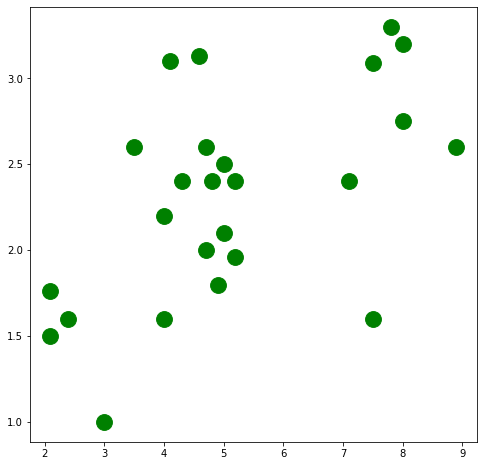

In [32]:
plt.figure(figsize=(8,8))
plt.scatter(x_train, y_train, s=250, c='green', label='Original data')
plt.show()

In [33]:
x = torch.from_numpy(x_train) #Converts dataset into tensors
y = torch.from_numpy(y_train)

In [34]:
x.size()

torch.Size([25, 1])

In [35]:
inp = 1
hidden = 5
out = 1

In [36]:
model = torch.nn.Sequential(torch.nn.Linear(inp, hidden), torch.nn.ReLU(), torch.nn.Linear(hidden, out))

In [37]:
loss_fn = torch.nn.MSELoss(reduction='sum')

In [38]:
learning_rate = 1e-4

for i in range(500):
    y_pred = model(x)
    loss = loss_fn(y_pred, y)
    print(i, loss.item())

    model.zero_grad()
    loss.backward()

    with torch.no_grad():
        for param in model.parameters():
            param  -= learning_rate*param.grad

0 41.18444061279297
1 28.650146484375
2 20.960203170776367
3 16.277273178100586
4 13.447985649108887
5 11.750812530517578
6 10.738541603088379
7 10.137018203735352
8 9.779982566833496
9 9.567566871643066
10 9.440261840820312
11 9.362847328186035
12 9.31458854675293
13 9.283327102661133
14 9.261960983276367
15 9.246349334716797
16 9.234081268310547
17 9.223762512207031
18 9.214578628540039
19 9.206061363220215
20 9.197935104370117
21 9.190046310424805
22 9.18229866027832
23 9.174644470214844
24 9.1670503616333
25 9.159500122070312
26 9.151984214782715
27 9.144493103027344
28 9.13702392578125
29 9.12957763671875
30 9.122153282165527
31 9.114747047424316
32 9.1073579788208
33 9.099991798400879
34 9.09264087677002
35 9.085308074951172
36 9.077994346618652
37 9.070700645446777
38 9.063425064086914
39 9.05616569519043
40 9.04892635345459
41 9.041701316833496
42 9.03449821472168
43 9.027313232421875
44 9.020143508911133
45 9.012992858886719
46 9.005860328674316
47 8.998744010925293
48 8.99164

In [39]:
predicted_in_tensor = model(x)
predicted_in_tensor

tensor([[2.1186],
        [1.4983],
        [2.8737],
        [2.7658],
        [2.0107],
        [2.9546],
        [3.2513],
        [2.2534],
        [2.0889],
        [1.4174],
        [3.0085],
        [2.1995],
        [2.8737],
        [2.1995],
        [1.9298],
        [3.0085],
        [2.2534],
        [2.1725],
        [1.6601],
        [2.1186],
        [1.9298],
        [2.1455],
        [1.7949],
        [1.4174],
        [1.9567]], grad_fn=<AddmmBackward>)

In [40]:
predicted = predicted_in_tensor.detach().numpy()
predicted

array([[2.1185503],
       [1.4982603],
       [2.8736854],
       [2.765809 ],
       [2.0106735],
       [2.9545927],
       [3.2512531],
       [2.2533956],
       [2.0888839],
       [1.4173529],
       [3.008531 ],
       [2.1994576],
       [2.8736854],
       [2.1994576],
       [1.9297663],
       [3.008531 ],
       [2.2533956],
       [2.1724885],
       [1.6600751],
       [2.1185503],
       [1.9297663],
       [2.1455193],
       [1.7949207],
       [1.4173529],
       [1.9567354]], dtype=float32)

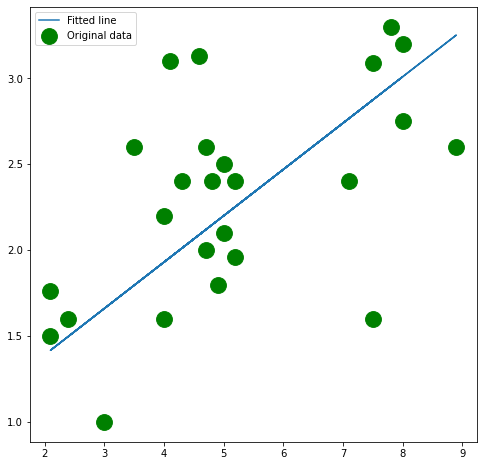

In [41]:
 plt.figure(figsize=(8,8))
 plt.scatter(x_train, y_train, c='green', s=250, label='Original data')
 plt.plot(x_train, predicted, label='Fitted line')
 plt.legend()
 plt.show()

In [42]:
#
#Using pytorch optimizers
#

In [43]:
model = torch.nn.Sequential(torch.nn.Linear(inp, hidden), torch.nn.ReLU(), torch.nn.Linear(hidden, out))
loss_fn = torch.nn.MSELoss(reduction='sum')

In [44]:
learning_rate = 1e-4
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

for i in range(500):
    y_pred = model(x)
    loss = loss_fn(y_pred, y)
    print(i, loss.item())

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

0 28.66999053955078
1 25.595378875732422
2 23.254213333129883
3 21.49288558959961
4 20.181724548339844
5 19.214374542236328
6 18.505796432495117
7 17.989503860473633
8 17.614500045776367
9 17.342315673828125
10 17.144344329833984
11 16.999547958374023
12 16.892637252807617
13 16.812572479248047
14 16.75146484375
15 16.703689575195312
16 16.665267944335938
17 16.633392333984375
18 16.606094360351562
19 16.58199691772461
20 16.560134887695312
21 16.539827346801758
22 16.52061653137207
23 16.502172470092773
24 16.484272003173828
25 16.46676254272461
26 16.449522018432617
27 16.43248748779297
28 16.415603637695312
29 16.39883041381836
30 16.382150650024414
31 16.36553955078125
32 16.34899139404297
33 16.33249282836914
34 16.3160400390625
35 16.299633026123047
36 16.283260345458984
37 16.26692771911621
38 16.250627517700195
39 16.23436164855957
40 16.218135833740234
41 16.201942443847656
42 16.185779571533203
43 16.16965103149414
44 16.153553009033203
45 16.137487411499023
46 16.12145805358

In [45]:
predicted_in_tensor = model(x)
predicted_in_tensor

tensor([[1.9774],
        [1.0637],
        [3.0896],
        [2.9308],
        [1.8185],
        [3.2088],
        [3.6458],
        [2.1760],
        [1.9337],
        [0.9446],
        [3.2883],
        [2.0966],
        [3.0896],
        [2.0966],
        [1.6993],
        [3.2883],
        [2.1760],
        [2.0568],
        [1.3021],
        [1.9774],
        [1.6993],
        [2.0171],
        [1.5007],
        [0.9446],
        [1.7390]], grad_fn=<AddmmBackward>)

In [46]:
predicted = predicted_in_tensor.detach().numpy()
predicted

array([[1.9773861 ],
       [1.063744  ],
       [3.0896463 ],
       [2.930752  ],
       [1.8184919 ],
       [3.208817  ],
       [3.6457763 ],
       [2.1760042 ],
       [1.9336903 ],
       [0.94457316],
       [3.2882643 ],
       [2.096557  ],
       [3.0896463 ],
       [2.096557  ],
       [1.6993212 ],
       [3.2882643 ],
       [2.1760042 ],
       [2.0568333 ],
       [1.3020854 ],
       [1.9773861 ],
       [1.6993212 ],
       [2.0171096 ],
       [1.5007033 ],
       [0.94457316],
       [1.7390447 ]], dtype=float32)

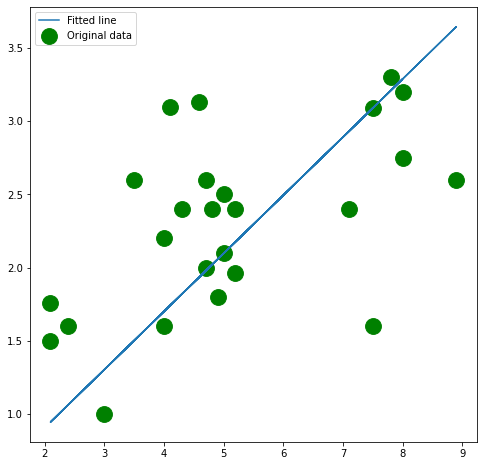

In [47]:
 plt.figure(figsize=(8,8))
 plt.scatter(x_train, y_train, c='green', s=250, label='Original data')
 plt.plot(x_train, predicted, label='Fitted line')
 plt.legend()
 plt.show()